## Lesson 5 - Facebook , Instagram Analytics & jieba




### Table of Contents

* [Facebook Posts](#fbposts)
* [Facebook Comments](#fbcomments)
* [Instagram Posts](#igposts)
* [PTT](#ptt)
* [Jieba & Wordcloud](#jieba)

<a id="fbposts"></a>
### Load Facebook posts csv from file

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

In [2]:
# Read posts data from csv
df_posts = pd.read_csv("data/facebook/appledailytw_facebook_posts.csv")
df_posts.head(1)

,Unnamed: 0,datetime,link_name,num_comments,num_reactions,num_shares,status_id,status_link,status_message,status_published,status_type
0,0,2019-08-12 15:54:12.591,​【柯P創黨】選不選總統？柯文哲：九月上旬就是最後時間,180,282,1,232633627068_10158286637462069,https://bit.ly/2SVkP0I,期待九月的到來( ͡° ͜ʖ ͡°)\r\n \r\n【柯Ｐ創「台灣民眾黨」承認目標進軍國會...,2019-08-01 10:26:57,link


In [3]:
if 'Unnamed: 0' in df_posts.columns:
    del df_posts['Unnamed: 0']
df_posts.head(1)

,datetime,link_name,num_comments,num_reactions,num_shares,status_id,status_link,status_message,status_published,status_type
0,2019-08-12 15:54:12.591,​【柯P創黨】選不選總統？柯文哲：九月上旬就是最後時間,180,282,1,232633627068_10158286637462069,https://bit.ly/2SVkP0I,期待九月的到來( ͡° ͜ʖ ͡°)\r\n \r\n【柯Ｐ創「台灣民眾黨」承認目標進軍國會...,2019-08-01 10:26:57,link


In [4]:
df_posts["年月日"] = df_posts["status_published"].apply(lambda x: str(x)[:10])
df_posts.head(1)

,datetime,link_name,num_comments,num_reactions,num_shares,status_id,status_link,status_message,status_published,status_type,年月日
0,2019-08-12 15:54:12.591,​【柯P創黨】選不選總統？柯文哲：九月上旬就是最後時間,180,282,1,232633627068_10158286637462069,https://bit.ly/2SVkP0I,期待九月的到來( ͡° ͜ʖ ͡°)\r\n \r\n【柯Ｐ創「台灣民眾黨」承認目標進軍國會...,2019-08-01 10:26:57,link,2019-08-01


In [5]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

In [6]:
df_posts['hour'] = hour(df_posts['status_published'])
df_posts['weekday'] = weekday(df_posts['status_published'])
df_posts.head(1)

,datetime,link_name,num_comments,num_reactions,num_shares,status_id,status_link,status_message,status_published,status_type,年月日,hour,weekday
0,2019-08-12 15:54:12.591,​【柯P創黨】選不選總統？柯文哲：九月上旬就是最後時間,180,282,1,232633627068_10158286637462069,https://bit.ly/2SVkP0I,期待九月的到來( ͡° ͜ʖ ͡°)\r\n \r\n【柯Ｐ創「台灣民眾黨」承認目標進軍國會...,2019-08-01 10:26:57,link,2019-08-01,10,4


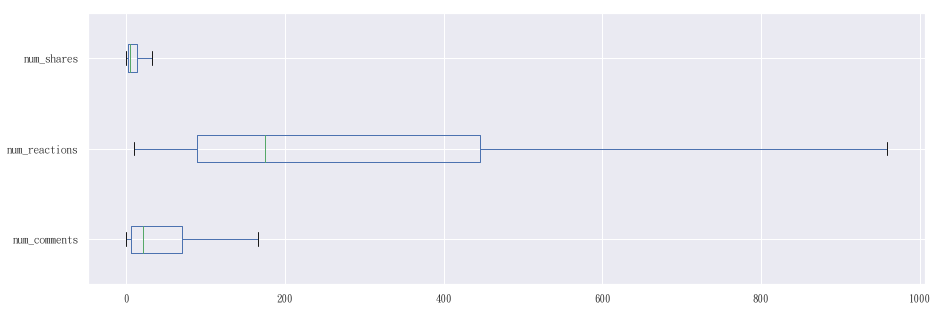

In [7]:
plot = df_posts[['num_comments','num_reactions', 'num_shares']].plot.box(figsize=(15,5), vert=False, showfliers=False)

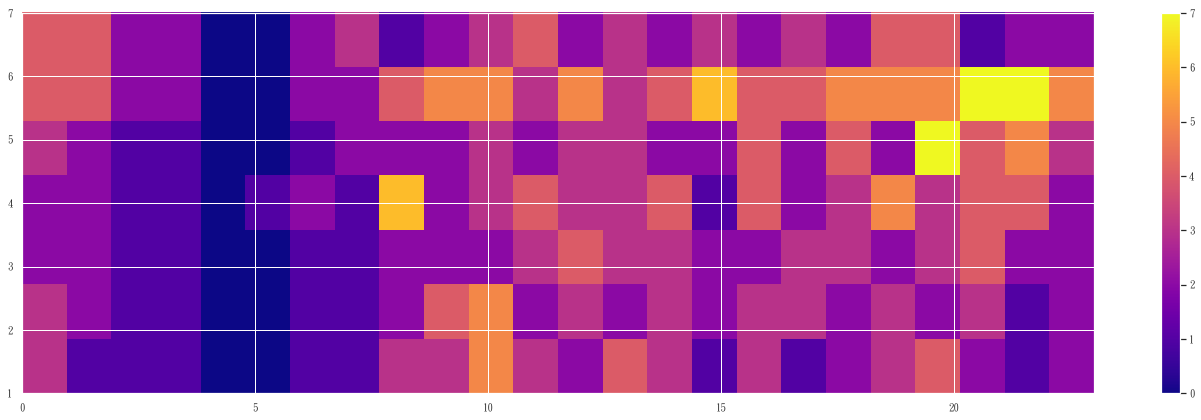

In [8]:
# 周間、24小時發文的熱度
plt.figure(figsize=(24,7))
plt.hist2d(df_posts['hour'], df_posts['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

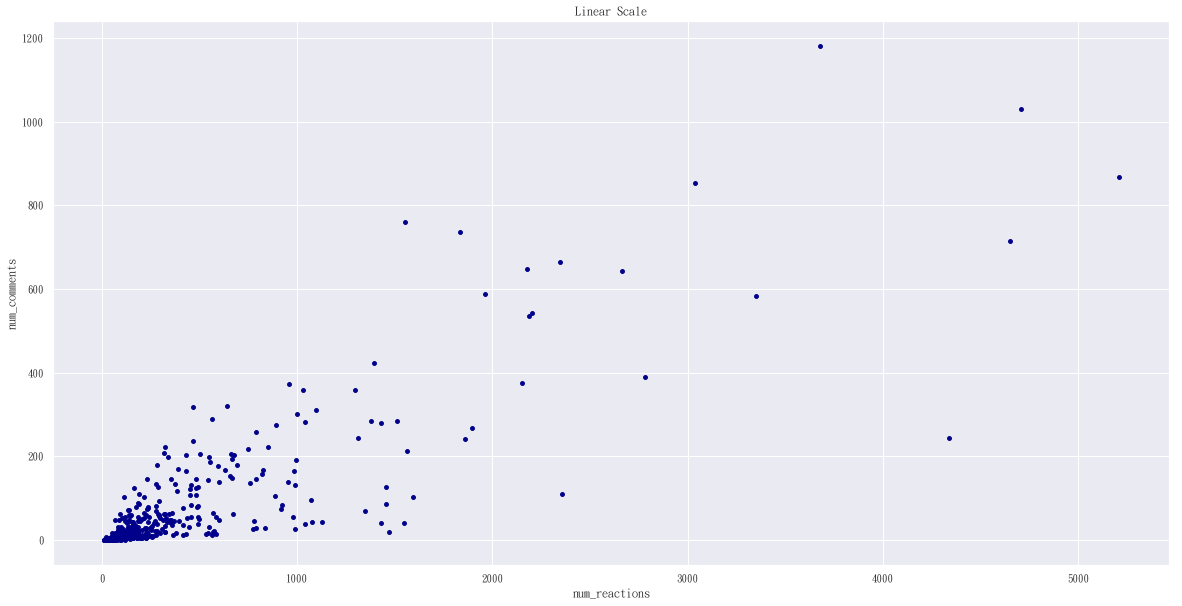

In [9]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
df_posts.plot.scatter(x='num_reactions',y='num_comments',c='DarkBlue',ax=ax[1], s=15)
plt.show()

<a id="fbcomments"></a>
### Load Facebook comments csv from file

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

In [11]:
# Read comments data from csv
df_comments = pd.read_csv("data/facebook/appledailytw_facebook_comments.csv")
df_comments.head(1)

,Unnamed: 0,comment_author,comment_id,comment_message,comment_published,datetime,num_reactions,parent_id,status_id
0,0,NaN,10158286637462069_10158286693292069,別被長期酸他的名嘴說中，去選總統，\r\n不然很難看。\r\n\r\n名嘴陰謀論說柯要往東，...,2019-08-01 10:53:58,2019-08-13 12:58:12.718,1,NaN,232633627068_10158286637462069


In [12]:
if 'Unnamed: 0' in df_comments.columns:
    del df_comments['Unnamed: 0']
df_comments.head(1)

,comment_author,comment_id,comment_message,comment_published,datetime,num_reactions,parent_id,status_id
0,NaN,10158286637462069_10158286693292069,別被長期酸他的名嘴說中，去選總統，\r\n不然很難看。\r\n\r\n名嘴陰謀論說柯要往東，...,2019-08-01 10:53:58,2019-08-13 12:58:12.718,1,NaN,232633627068_10158286637462069


In [13]:
df_comments["年月日"] = df_comments["comment_published"].apply(lambda x: str(x)[:10])
df_comments.head(1)

,comment_author,comment_id,comment_message,comment_published,datetime,num_reactions,parent_id,status_id,年月日
0,NaN,10158286637462069_10158286693292069,別被長期酸他的名嘴說中，去選總統，\r\n不然很難看。\r\n\r\n名嘴陰謀論說柯要往東，...,2019-08-01 10:53:58,2019-08-13 12:58:12.718,1,NaN,232633627068_10158286637462069,2019-08-01


In [14]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

In [15]:
df_comments['hour'] = hour(df_comments['comment_published'])
df_comments['weekday'] = weekday(df_comments['comment_published'])
df_comments.head(1)

,comment_author,comment_id,comment_message,comment_published,datetime,num_reactions,parent_id,status_id,年月日,hour,weekday
0,NaN,10158286637462069_10158286693292069,別被長期酸他的名嘴說中，去選總統，\r\n不然很難看。\r\n\r\n名嘴陰謀論說柯要往東，...,2019-08-01 10:53:58,2019-08-13 12:58:12.718,1,NaN,232633627068_10158286637462069,2019-08-01,10,4


In [16]:
contentWordCount = 0
contentTotalWordCount = []

for message in df_comments['comment_message']:
    contentWordCount = 0
    if type(message) is not float:
        contentWordCount += len("".join(message.split()))
    else:
        contentWordCount += 0
    contentTotalWordCount.append(contentWordCount)

In [17]:
df_comments['comment_word_count'] = contentTotalWordCount
df_comments.head(1)

,comment_author,comment_id,comment_message,comment_published,datetime,num_reactions,parent_id,status_id,年月日,hour,weekday,comment_word_count
0,NaN,10158286637462069_10158286693292069,別被長期酸他的名嘴說中，去選總統，\r\n不然很難看。\r\n\r\n名嘴陰謀論說柯要往東，...,2019-08-01 10:53:58,2019-08-13 12:58:12.718,1,NaN,232633627068_10158286637462069,2019-08-01,10,4,50


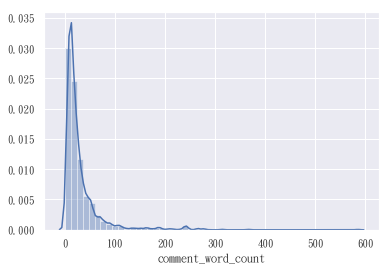

In [18]:
# 查看留言字數分布
sns.distplot(df_comments['comment_word_count'])

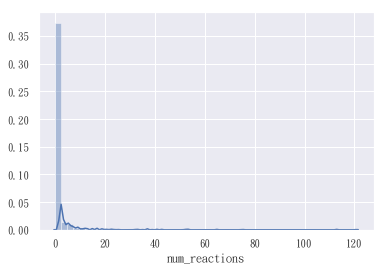

In [19]:
# 大多數留言沒有互動
sns.distplot(df_comments['num_reactions'])

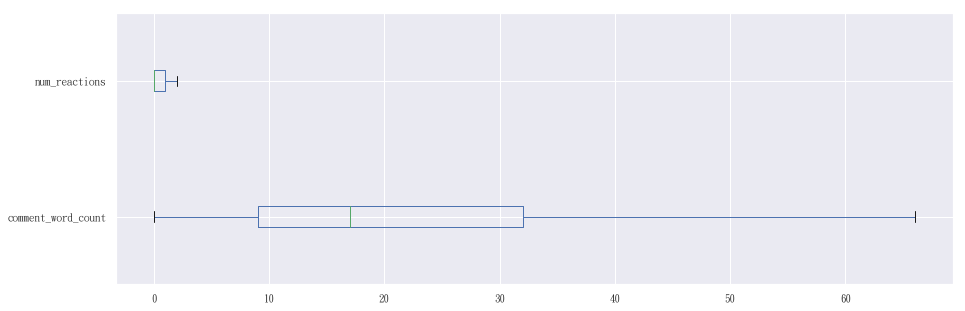

In [20]:
plot = df_comments[['comment_word_count','num_reactions']].plot.box(figsize=(15,5), vert=False, showfliers=False)

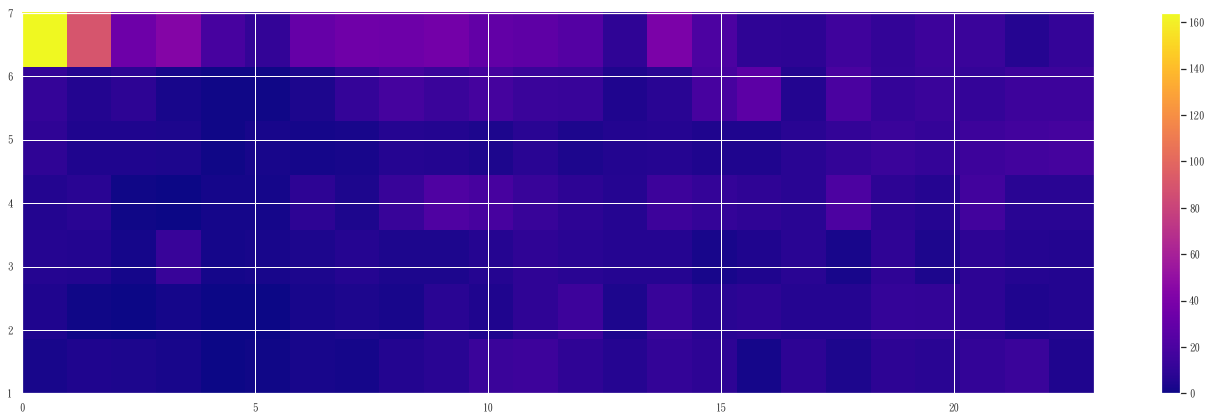

In [21]:
# 周間、24小時 留言 的熱度
plt.figure(figsize=(24,7))
plt.hist2d(df_comments['hour'], df_comments['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

<a id="igposts"></a>
##  Instagram上的發文分佈與視覺化分析

In [22]:
import pandas as pd

In [23]:
df_ig = pd.read_csv("data/pandas_data/ig_personal.csv")

In [24]:
# df_ig.shape[0]
len(df_ig.index)

100028

In [25]:
if 'Unnamed: 0' in df_ig.columns:
    del df_ig['Unnamed: 0']
df_ig.head(1)

,comments_count,content,followers_count,following_count,is_business_account,likes_count,post_time,post_timestamp,posts_count,username
0,1.0,#记一次 演唱会📍北京\r\n\r\n安静地听👂🏻\r\n我爱的少年\r\n唱歌～🎤🎶,26,135.0,False,33.0,2018-10-23 17:18:18,1540286298,5.0,tangkuai_er1206


In [26]:
contentWordCount = 0
contentTotalWordCount = []

for message in df_ig['content']:
    contentWordCount = 0
    if type(message) is not float:
        contentWordCount += len("".join(message.split()))
    else:
        contentWordCount += 0
    contentTotalWordCount.append(contentWordCount)

In [27]:
df_ig['postWordCount'] = contentTotalWordCount
df_ig.head(1)

,comments_count,content,followers_count,following_count,is_business_account,likes_count,post_time,post_timestamp,posts_count,username,postWordCount
0,1.0,#记一次 演唱会📍北京\r\n\r\n安静地听👂🏻\r\n我爱的少年\r\n唱歌～🎤🎶,26,135.0,False,33.0,2018-10-23 17:18:18,1540286298,5.0,tangkuai_er1206,26


In [28]:
# 這些是錯誤的 followers_count，理應為數值，但資料集中為字串 True，看來是欄位錯位的問題
df_ig[df_ig["followers_count"]=="True"]

,comments_count,content,followers_count,following_count,is_business_account,likes_count,post_time,post_timestamp,posts_count,username,postWordCount
32212,60134.0,7350,True,432.0,2014-10-19 04:36:05,1.413665e+09,3074,bodyangelactivewear,NaN,NaN,4
32216,60134.0,7350,True,478.0,2014-10-17 07:27:05,1.413502e+09,3074,bodyangelactivewear,NaN,NaN,4
32225,60134.0,7350,True,279.0,2014-10-11 01:17:21,1.412961e+09,3074,bodyangelactivewear,NaN,NaN,4
32232,60134.0,7350,True,471.0,2014-10-06 23:01:08,1.412608e+09,3074,bodyangelactivewear,NaN,NaN,4
32238,60134.0,7350,True,285.0,2014-10-02 00:27:58,1.412181e+09,3074,bodyangelactivewear,NaN,NaN,4
32242,60134.0,7350,True,286.0,2014-09-29 05:11:01,1.411939e+09,3074,bodyangelactivewear,NaN,NaN,4
32251,60134.0,7350,True,352.0,2014-09-23 22:15:55,1.411482e+09,3074,bodyangelactivewear,NaN,NaN,4
32259,60134.0,7350,True,330.0,2014-09-19 03:46:19,1.411070e+09,3074,bodyangelactivewear,NaN,NaN,4
32265,60134.0,7350,True,450.0,2014-09-14 04:43:30,1.410641e+09,3074,bodyangelactivewear,NaN,NaN,4
32273,60134.0,7350,True,460.0,2014-09-07 02:47:49,1.410029e+09,3074,bodyangelactivewear,NaN,NaN,4


In [29]:
# 刪除這些錯位的資料筆數
df_ig = df_ig.drop(df_ig[df_ig["followers_count"]=="True"].index)

In [30]:
# 強制將 followers_count 欄位轉成 數值
df_ig['followers_count'] = pd.to_numeric(df_ig['followers_count'], errors='coerce')

In [31]:
## 將字串欄位轉型別為整數欄位
df_ig["comments_count"] = df_ig["comments_count"].fillna("0").astype(int)
df_ig["followers_count"] = df_ig["followers_count"].fillna("0").astype(int)
df_ig["following_count"] = df_ig["following_count"].fillna("0").astype(int)
df_ig["likes_count"] = df_ig["likes_count"].fillna("0").astype(int)
df_ig["posts_count"] = df_ig["posts_count"].fillna("0").astype(int)
df_ig["posts_count"] = df_ig["posts_count"].fillna("0").astype(int)
df_ig["post_time"] = df_ig["post_time"].fillna("na").astype(str)

In [32]:
# 刪除時間為 na 錯位的資料筆數
df_ig = df_ig.drop(df_ig[df_ig["post_time"]=="na"].index)

In [33]:
# 再次確認發文時間是否有小於10個字數的
df_ig[df_ig['post_time'].apply(lambda x: len(x) <= 10)]

,comments_count,content,followers_count,following_count,is_business_account,likes_count,post_time,post_timestamp,posts_count,username,postWordCount
38654,3573,549,0,177,2017-12-16 01:50:44,1513360244,663,paco_dili,0,NaN,3


In [34]:
# 刪除使用者名稱為 na
df_ig = df_ig.dropna(subset=['username'])

In [35]:
# 確認已經沒有發文時間錯誤的問題
# df_ig = df_ig.drop(df_ig[df_ig['post_time'].apply(lambda x: len(x) <= 10)])
df_ig[df_ig['post_time'].apply(lambda x: len(x) <= 10)]

,comments_count,content,followers_count,following_count,is_business_account,likes_count,post_time,post_timestamp,posts_count,username,postWordCount


In [36]:
df_ig.head(1)

,comments_count,content,followers_count,following_count,is_business_account,likes_count,post_time,post_timestamp,posts_count,username,postWordCount
0,1,#记一次 演唱会📍北京\r\n\r\n安静地听👂🏻\r\n我爱的少年\r\n唱歌～🎤🎶,26,135,False,33,2018-10-23 17:18:18,1540286298,5,tangkuai_er1206,26


In [37]:
df_ig.to_parquet("results/ig_posts.parquet")

In [38]:
"Unique User Count : %d" % len(df_ig['username'].unique())

'Unique User Count : 528'

In [39]:
# filterFollower = df_ig[(df_ig['followers_count']<=10000) & (df_ig['followers_count']>=0) & (df_ig['posts_count']>=0) & (df_ig['likes_count']>=0) & (df_ig['comments_count']>=0)]

In [40]:
filterFollower = df_ig[(df_ig['followers_count']<=10000)&(df_ig['followers_count']>=0)&(df_ig['posts_count']>=0)&(df_ig['likes_count']>=0)&(df_ig['comments_count']>=0)]
filterPost = filterFollower
final = filterPost

In [41]:
"Filtered Unique User Count : %d" % len(filterPost['username'].unique())

'Filtered Unique User Count : 504'

In [42]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

In [43]:
final['hour'] = hour(final['post_time'])
final['weekday'] = weekday(final['post_time'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
groupbyUsermMean = final.groupby('username').mean()

In [45]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

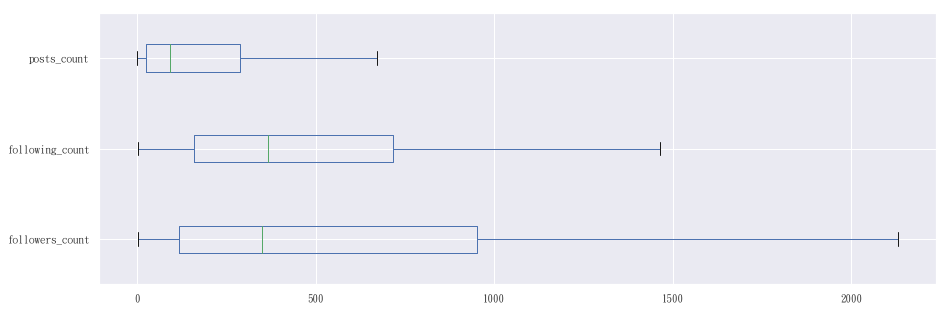

In [46]:
plot = groupbyUsermMean[['followers_count','following_count', 'posts_count']].plot.box(figsize=(15,5), vert=False, showfliers=False)

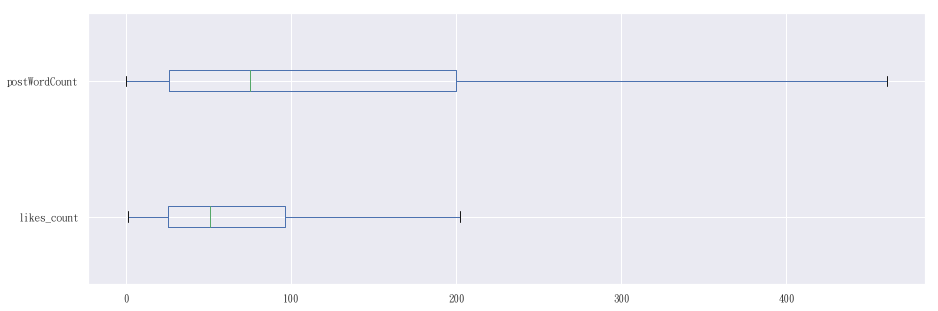

In [47]:
plot = final[['likes_count', 'postWordCount']].plot.box(figsize=(15,5), vert=False, showfliers=False)

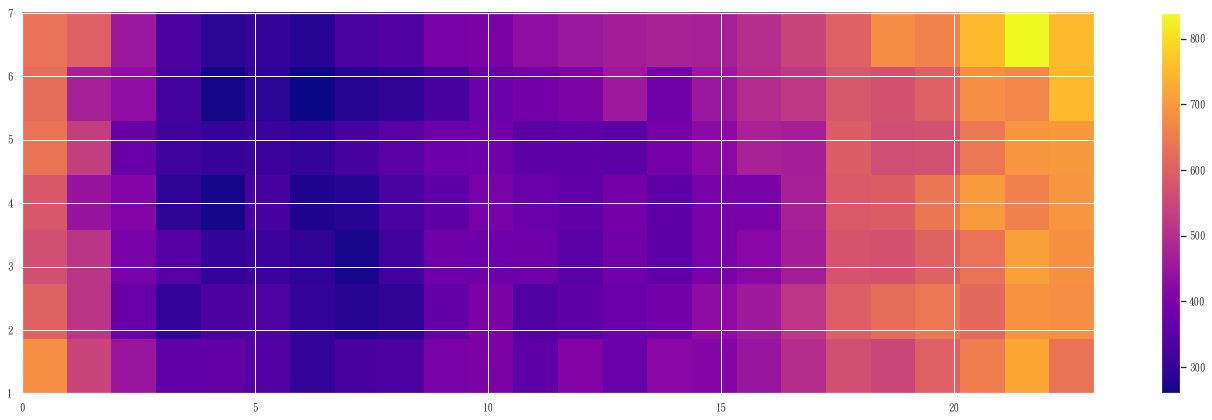

In [48]:
# 周間、24小時發文的熱度
plt.figure(figsize=(24,7))
plt.hist2d(final['hour'], final['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

### scatter by followers count and post count

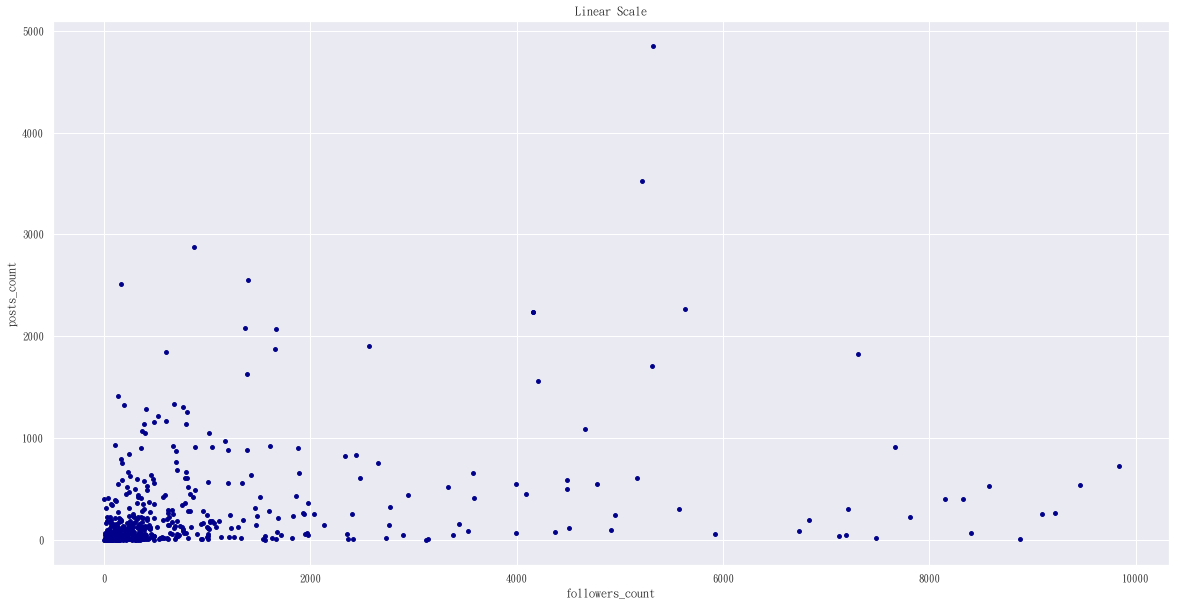

In [49]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='followers_count',y='posts_count',c='DarkBlue',ax=ax[1], s=15)
plt.show()

### correlation between following count and followers count

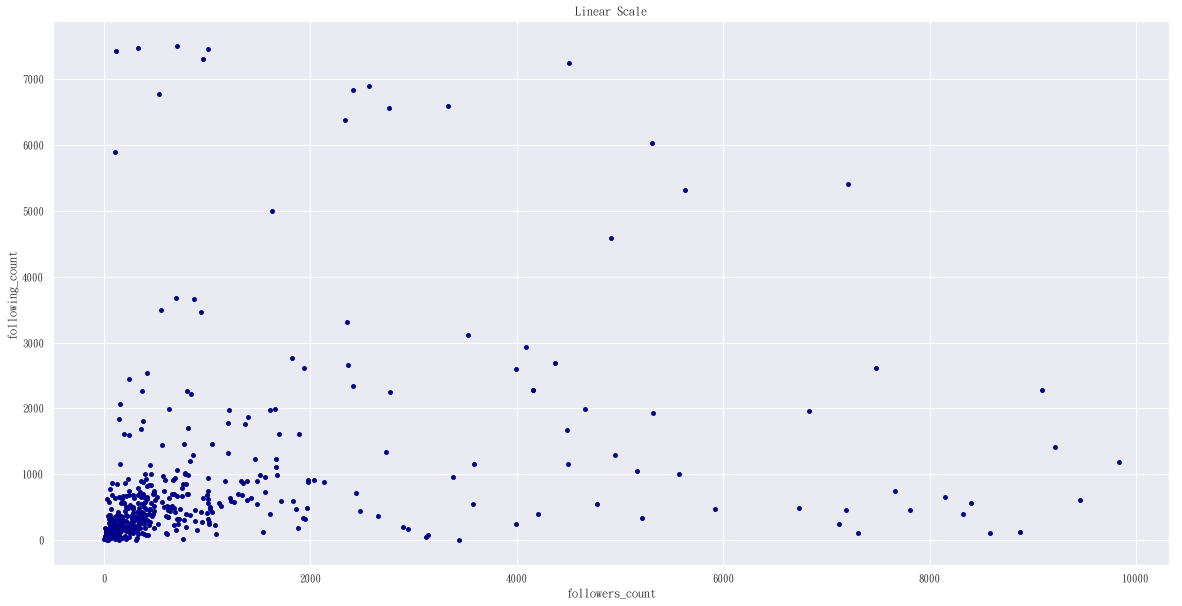

In [50]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='followers_count',y='following_count',c='DarkBlue',ax=ax[1], s=15)
plt.show()

### correlation between likes count and followers count

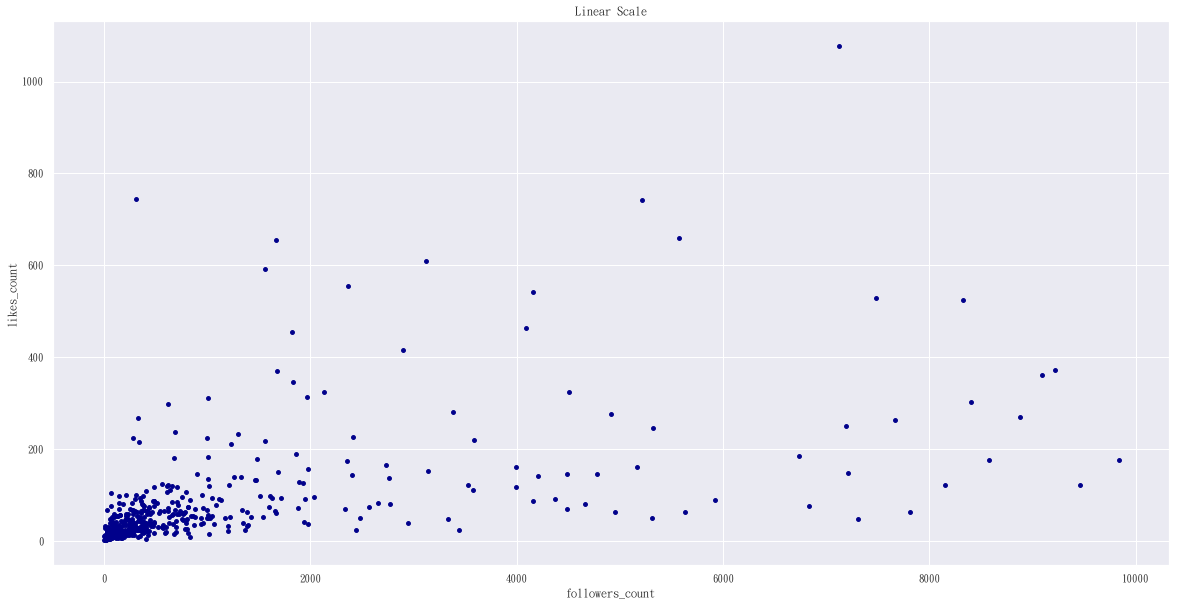

In [51]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='followers_count',y='likes_count',c='DarkBlue',ax=ax[1], s=15)
plt.show()

### Homework: your Instagram user insight?

Rules:
1. by adding column by combine several column, like ratio, to see what happened?
2. can you classify different follower count, to see the difference?

<a id="ptt"></a>
### Load PTT posts xlsx from file

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

df_ = pd.read_excel ('data/ptt/ptt_post_comments.xlsx')
df_.head(1)

,Unnamed: 0,_id,board,title,author,content,date,ip,locale,comments,score,url,updatetime,word_count,comment_word_count,comment_count,average_comment_word_count,post_published,hour,weekday
0,1,5dba40ec8572012ce7c3d40a,Gossiping,Re: [新聞] 桃市前經發局長帶女友開房間 「威而鋼」要求廠商埋單,kingtama,\n這個似乎不單純\n\n朱松偉拿去餵狗\n\n結果還出現健行科大\n\n是同一個人嗎??\...,2019-10-31 10:02:46,60.248.140.205,(臺灣),"[{'user': 'deann', 'content': ': 在健行科大要混教職蠻簡單的...",0,https://www.ptt.cc/bbs/Gossiping/M.1572487369....,2019-10-31 10:03:24.375,56,18,1,18.0,2019-10-31 10:02:46,10,4


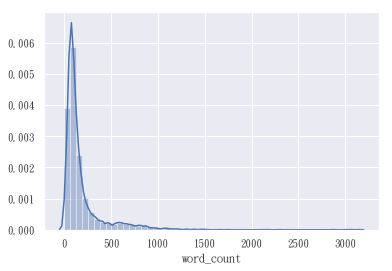

In [53]:
# 查看發文字數分布
sns.distplot(df_['word_count'])

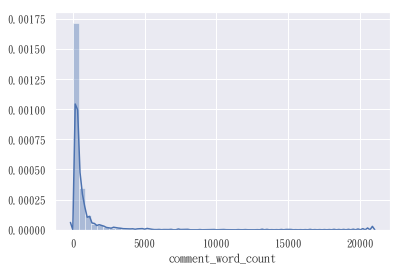

In [54]:
# 查看留言字數分布
sns.distplot(df_['comment_word_count'])

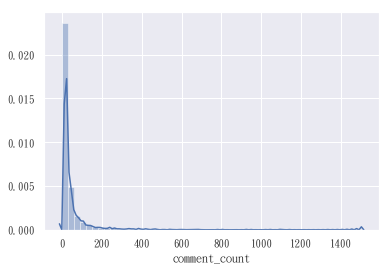

In [55]:
# 發文留言的分布
sns.distplot(df_['comment_count'])

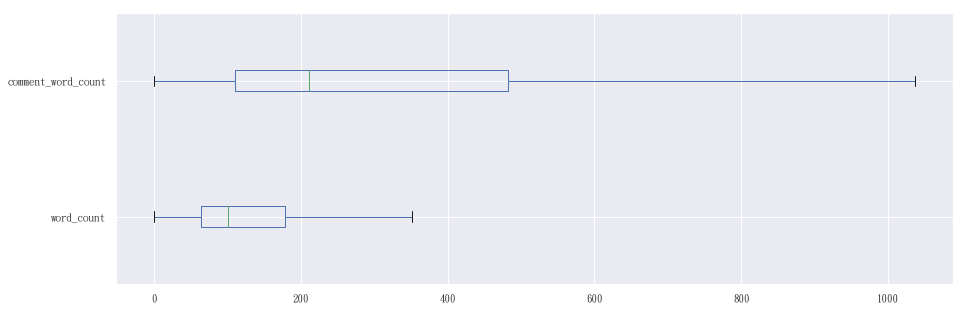

In [56]:
plot = df_[['word_count','comment_word_count']].plot.box(figsize=(15,5), vert=False, showfliers=False)

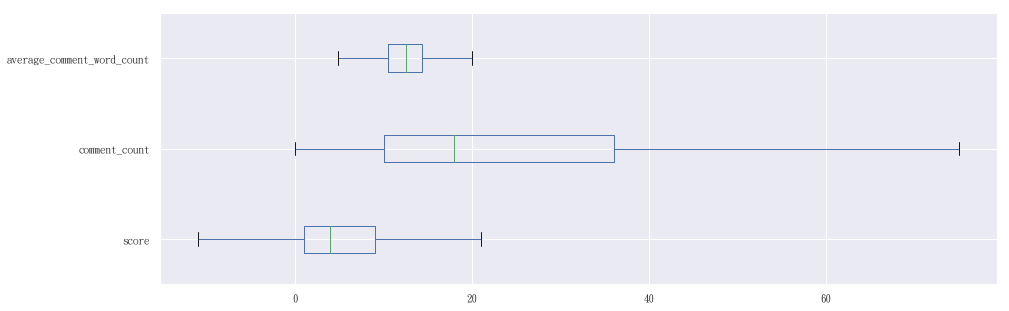

In [57]:
plot = df_[['score','comment_count', 'average_comment_word_count']].plot.box(figsize=(15,5), vert=False, showfliers=False)

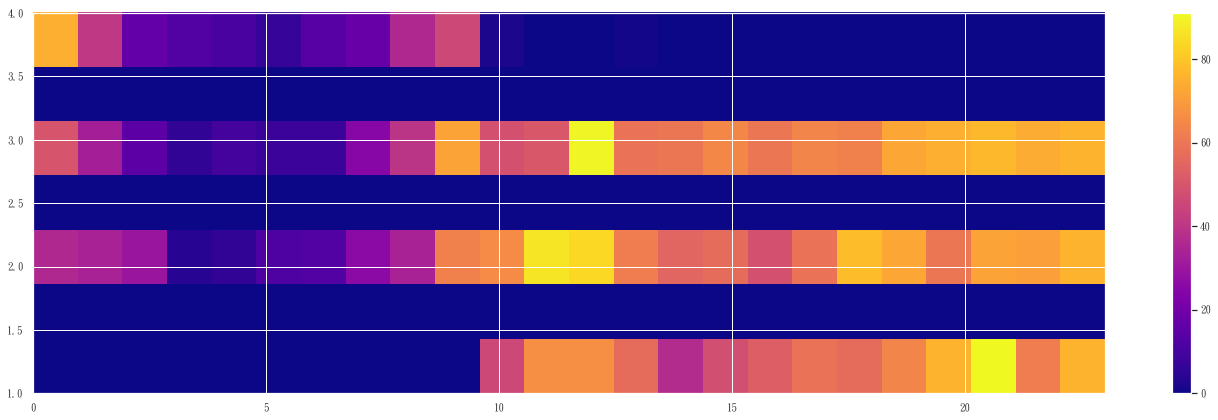

In [58]:
# 周間、24小時發文的熱度
plt.figure(figsize=(24,7))
plt.hist2d(df_['hour'], df_['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

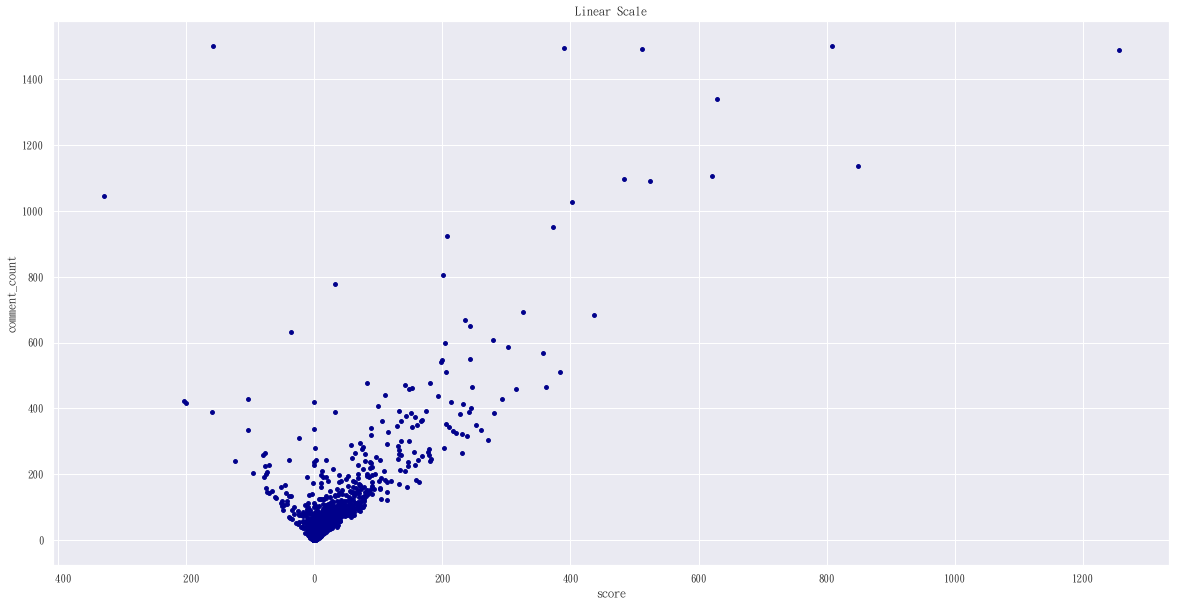

In [59]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
df_.plot.scatter(x='score',y='comment_count',c='DarkBlue',ax=ax[1], s=15)
plt.show()

In [60]:
"Unique PTT User Count : %d" % len(df_['author'].unique())

'Unique PTT User Count : 1759'

### Homework
- extract comment datetime
- check engagement by hour using heat map
- what did you find?

<a id="jieba"></a>
### Jieba in Chinese

In [61]:
# 中文分詞
import jieba

jieba.initialize()

seg_list = jieba.cut("我來自成功大學資訊工程系")
print(" / ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.cache
Loading model cost 0.812 seconds.
Prefix dict has been built succesfully.


我來 / 自 / 成功 / 大學 / 資訊 / 工程系


In [62]:
# 全模式
seg_list = jieba.cut("我來自成功大學資訊工程系", cut_all=True)
print(" / ".join(seg_list))

我 / 來 / 自成 / 成功 / 大 / 學 / 資 / 訊 / 工程 / 工程系


In [63]:
seg_list = jieba.cut("我們去了日本迪士尼樂園", cut_all=False)
print(" / ".join(seg_list))

seg_list = jieba.cut("We went to Disneyland in Japan", cut_all=False)
print(" / ".join([x for x in seg_list if len(x.strip())>0]))

我們 / 去 / 了 / 日本 / 迪士尼 / 樂園
We / went / to / Disneyland / in / Japan


### load_userdict 使用者自定義字典

In [64]:
jieba.initialize()
jieba.load_userdict('dict/mydic.txt')

seg_list = jieba.cut("我們去了日本迪士尼樂園", cut_all=False)
print(" / ".join(seg_list))

seg_list = jieba.cut("We went to Disneyland in Japan", cut_all=False)
print(" / ".join([x for x in seg_list if len(x.strip())>0]))

我們 / 去 / 了 / 日本 / 迪士尼樂園
We / went / to / Disneyland / in / Japan


## Facebook comments most use words in Chinese

In [65]:
# clean text, store into different column
df_comments["clean_message"] = df_comments["comment_message"].apply(lambda x: str(x).strip().replace('\n','').replace('\r',''))

In [66]:
df_comments["clean_message"][15:20]

15         笑殺小啦襙你媽那些按笑的你們根本沒人性淹這麼慘是給你們笑?有種明天都來桃園找我輸贏我操！
16                            高雄有妖孽。黃老妖 韓術士🇹🇼 [[PHOTO]]
17    https://hssszn.com/archives/64308?fbclid=IwAR1...
18                                     哪是受到中美戰爭影響，本來就賠了
19    在大陸經商，要麼學蔡旺旺，充當紅色滲透馬前卒，要麼容許紅二代當地官員還有地頭蛇入乾股，否則注...
Name: clean_message, dtype: object

In [67]:
for x in df_comments["clean_message"][15:20]:
    seg_list = jieba.cut(x, cut_all=False)
    segments = ""
    for s in seg_list:
        segments = segments + " " + s.replace("　","").replace(" ","").strip()
    if len(segments.strip())>0:
        segments = segments.replace("　","").strip()
        print(segments)

笑 殺 小 啦 襙 你 媽 那些 按笑 的 你 們 根本 沒 人性 淹 這麼 慘是給 你 們 笑 ? 有種 明天 都 來 桃園 找 我 輸贏 我 操 ！
高雄 有 妖孽 。 黃 老妖  韓術士 🇹 🇼  [ [ PHOTO ] ]
https : / / hssszn . com / archives / 64308 ? fbclid = IwAR1UDCGfWEgXTkmK7ohA _ IltxwTu8Y - 7kLu6F2N0sflKeqxKaOt5CB3WyRc  [ [ SHARE ] ]
哪是 受到 中美戰爭 影響 ， 本來 就 賠 了
在 大陸 經商 ， 要麼學 蔡 旺旺 ， 充當 紅色 滲透馬前 卒 ， 要麼容 許紅 二代 當地 官員 還有 地頭 蛇入 乾股 ， 否則 注定 失敗 ， 林志 昇 的 「 從 中國大陸 出逃 」 就是 個 最 有名 的 例子 。 沒有 全部 被鯨豚 已 是 不幸 中之萬幸 。


In [68]:
import re
import jieba

jieba.initialize()
jieba.load_userdict('dict/mydic.txt')

# add stop words filtering list
stopwordset = set()
with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
    for line in sw:
        stopwordset.add(line.strip('\n'))

In [69]:
clean_list = []
for x in df_comments["clean_message"][15:20]:
    x = re.sub(r"http\S+", "", x)
    seg_list = jieba.cut(x, cut_all=False)
    segments = ""
    for s in seg_list:
        if (s not in stopwordset) and len(s)>1:
            segments = segments + " " + s.replace("　","").replace(" ","").strip()
    if len(segments.strip())>0:
        segments = segments.replace("　","").strip()
        clean_list.append(segments)
        print(segments)

按笑 根本 人性 慘是給 有種 明天 桃園 輸贏
高雄 妖孽 老妖 韓術士
哪是 受到 中美戰爭 影響 本來
大陸 經商 要麼學 旺旺 充當 紅色 滲透馬前 要麼容 許紅 二代 當地 官員 地頭 蛇入 乾股 注定 失敗 林志 中國大陸 出逃 有名 例子 全部 被鯨豚 不幸 中之萬幸


In [70]:
clean_list = []
for x in df_comments["clean_message"]:
    x = re.sub(r"http\S+", "", x)
    seg_list = jieba.cut(x, cut_all=False)
    segments = ""
    for s in seg_list:
        if (s not in stopwordset) and len(s)>1:
            segments = segments + " " + s.replace("　","").replace(" ","").strip()
    if len(segments.strip())>0:
        segments = segments.replace("　","").strip()
        clean_list.append(segments)
        print(segments)

期酸 名嘴 選總統 很難 名嘴 陰謀論 柯要 往東 柯難 就要 往東 聽話
孫子 喜歡 這種 車子 還常 看錄 影帶 場子裡頭 圈圈 摔倒 無不無聊
陳鵬文 車子 摔成 奶奶
Burny Hsieh 烈火 戰車
別去
記得 第一任 女友 陶君薇
Andy Yang 順便 透露 年紀
Hsu Tian Hsiang
Andy Yang 不敢 喝礦 泉水
約華仔 飆車
市長當 半年 選總統 白痴 耍續 億選舉 補助款 ...... 無恥
智障 舔韓 垃圾
中時 弱智 電子
王八蛋 爛臭民 進黨 執政 每次 出訪 總統 專機 走私 出包 推給 前朝 前朝 陋規 真是 媽無極 王八蛋 執政 利用 總統 專機 走私 煙近 10 臉敢 推給 前朝 陋規 真是 無能 無恥 無賴爛 極點 走私 前朝 陋規 貪瀆 貪污 貪瀆 到現 蔡大 騙子 查到 貪瀆 貪污 前朝 貪瀆 留下 陋規 執政無能 無恥 怪別 有過 推給 前朝 撇清 無能 責任 真是 無能 無恥 無良 無賴爛民 進黨 蔡大騙 子集 團政權 政客 真幹 媽的 王八蛋 無恥
政治 人物 精神 支持 根本 不會管 死活 只好 精神 支持 走私 總統 專機 可怕 雄三飛彈 士官 發射 眼鏡 直升 提供 藝人 拍照 厲害 滾開 別來 操作台 灣的 選舉 黎智英 胖子 回歸大陸 慢走 不送 死黎 胖子 香港 少來 這套 油油的 胖子 真討厭
按笑 根本 人性 慘是給 有種 明天 桃園 輸贏
高雄 妖孽 老妖 韓術士
哪是 受到 中美戰爭 影響 本來
大陸 經商 要麼學 旺旺 充當 紅色 滲透馬前 要麼容 許紅 二代 當地 官員 地頭 蛇入 乾股 注定 失敗 林志 中國大陸 出逃 有名 例子 全部 被鯨豚 不幸 中之萬幸
蔡文瑜
Eileen Chung
這時候 天佑 印尼
阿彌陀佛
別管 這了 先幫 中華隊 加油 全壘 目前 平手
李文耀 好險
許家瑋 似曾 相似
還以 國昌
台灣 想問 他媽 每天 意思 阿幹
唱衰 丟臉
不用 衰才 剛要 亳無誠信 下場
畜生
這臉 悔意 你當 白痴 韓粉 你老 目咧
看吧 廢死民 進黨 執政
是不是 小時候 媽媽 吃屎
警察 開槍射 社會 愚民 支持
低能 無腦
活該
明明 選得 要死 賤人 矯情
國民黨 選市 民進 選總統 還逼 讀書 結婚 生小孩 醫生 你老 陽明 台大 醫學院院 畢業 請問

辣鸡 记者 死有余辜
可憐 大陸人 看透 透台灣 還不醒
裡面 支持 中間 29998 支持 外圍 千多 抗議 灣人 低能
高雄 女學生 女人 沒出 現反 兩位 憨粉 只會 欺負 弱小
支那 日本 韓國給
韓狗 畜牲 別來 台灣 歡迎
獲得 傻女 肉體 渣黨
這妓 编是 韓粉
消費 死者 有夠 垃圾 女兒 討錢 之餘 還順 英文 真是 傑出 一手
妓者 媽的行
有民眾 拍下 警察 脫下 制服 換上 白衣 影片 明顯 民眾裡 混進 黑警 黑社會 親共 人士
集中 營洗腦 身上 器官 保命 了還 在乎
獲得 傻女 肉體 渣黨
私刑 普世價值
草包 畜牲
獲得 傻女 肉體 渣黨
粉專 流氓 耳聾 封鎖 dpp
腦包 苦痛 作弄 這種 腦殘
帳號 專職 網工 帳號 每天 圖帶 風向 抹黑
這種 文還 有人 要泛 政治 腦包
獲得 傻女 肉體 渣黨
還沒選 老共一 鼻子 出氣 ..... 這也 流氓 眼裡 怎會 正義 二字 明著 .........
嘖嘖 方私 對方 特首 哪一個 台灣要 發展 下去 狗咬狗 一嘴
報導 事主 抽煙 明明
私刑 普世價值
三重 砍死 大幸
廢物 沒尊 嚴帶種
Tom Stone 生意 會受 影響 可惡
很棒 週五 風假 一堆 智障 上山 靠海 自然 消滅 美好
它媽 趕緊 登陸 快熱
台灣 藍綠 以為 藍爛 完換 綠爛 一定 再換 完全 吃定 台灣
中國 蘋果 郭出 破壞 綠淫絕 狂灌 票給 分裂 走私 超買菜 著選
選個 親共來 當總統 選民是 這種 缺德 心安 神明 列祖列宗 下一代
國民黨 英狗執 中共 惡魔帝 國禍害 台灣 極深
判國 通敵 統統 抓起
一定 政府 害小煙 政府 國民黨 真無恥
美薇 Mewina Luo
Pan Yi Hsuan 跌倒
柯屁 韓極 混有何 差別 講話 不用 負責任 你老
靠北 臉書 多愛貼 真受不了
中國養 走狗
獲得 傻女 肉體 渣黨
苹果 不要脸 黑衣 暴徒 破坏 打砸抢 为什么 这样 暴徒 别人 你们 这些 人渣 打死 活该
AVATAR
台湾人 卑劣 一个 台湾人 空间 习近平 为什么 要说 这种 台湾 选举 导致 没有 底线 下贱 觉得 中华民族 优良传统 台湾 选举 三代 正义 是非 只会 诽谤 抹黑 攻击 这个 孙子 估计 自导自演 然后 举报 一万个 下贱 锦旗 他家 ID Dan De

上次 國民黨 沒人敢 選總統 挺身而出 台獨 猖狂 疫區 挑戰 數典 忘祖 國民黨 垃圾 瞧不起
小心
老房子 小心
分爭 分裂 挑撥 離間 垃圾 一貫 選舉 技倆 選舉 還沒 結束 這種 畜牲 黨濺 使用 選舉 結束 全台灣 務必 團結 消滅民 進黨 殲滅民 進黨毀 滅民進 小心 一些 垃圾 媒體 配合 綠蠢 豬等級網 混在 臉書裡 假借 支持 郭陣營 柯陣營 名義 臉書裡 面及 版面 全台 衝突 分裂 社會間 矛盾 千萬要 小心
許文川 避免 拒絕 國民黨
分爭 分裂 挑撥 離間 垃圾 一貫 選舉 技倆 選舉 還沒 結束 這種 畜牲 黨濺 使用 選舉 結束 全台灣 務必 團結 消滅民 進黨 殲滅民 進黨毀 滅民進 小心 一些 垃圾 媒體 配合 綠蠢 豬等級網 混在 臉書裡 假借 支持 郭陣營 柯陣營 名義 臉書裡 面及 版面 全台 衝突 分裂 社會間 矛盾 千萬要 小心
這算 蔡包 四處 灑狗
韓狗 一大 不信 問中天
垃圾
連韓國瑜養 蘋果 媽要 惡犬 有多腦
獲得 傻女 肉體 渣黨
公司 資產應 早就 林家 完全 掏空 可憐 小股民 只能 無淚 政府 重判 掏空 公司 股東 小股民 禿鷹 宰殺
籃子 放一樣 地方 死路 一條
國民黨 雜碎
共黨 死性不改
國民黨 台灣 人才 更能 看清楚
還好 沒付 十元
10 元升級 廣告 收看 關也關 強迫 收看 我告
可憐 肥胖 哈哈哈 哈哈哈
三民 自壹 蘋果 民進 黨報 不到 假槍
潘巧容
應該 家境 不差 幹嘛生
媽窮 石油
幹話
清晨 五點 小英 睡覺 蘇貞昌 睡覺 內政部長 交通部 一堆 部長 睡覺 .......... 害到 韓市 昨晚 喝醉 本來 公假 自然 害到 藍營 縣市 妙妙 地震 幾點 起床 民進 執政 奇怪 ..... 萬一國民黨 重返 執政 韓總統 喝酒 公假 睡覺 日子 怎麼過
氣象局 一天 風假
沒關 已經 放假 減弱
垃圾 敗類 打死
江湖 姦殺
死賀
再次 提醒 民眾 留意 小心 李國華 0928756168 張富發 0938699776 這兩個 垃圾 不實 廚具 水電 生意 信用 雜牌 兩光 超貴 免治馬桶 欺詐財 注意 李國華 0928756168 張富發 0938699776 這兩個 兇手 陷阱 再有 下一個 受害者
雨勢 變大
再次 提醒 民眾 留意 小心 李國華 092875

請桃園 全國 分區 議員 告訴 這農舍 農用 那農舍 違建 部份
三民 自壹 蘋果 民進 黨報 不到 假槍
黑到連 健康 螟禁黨 不用 其極
快點 市長
楊育惠
左麗宜
韓國瑜 下個 禮拜 就要 健康 沾沾自喜 台灣 經濟 成長 四小龍 之冠 平均 薪資近 反毒 成效 擔憂 腦子 是否 無恙
三大症 狀分別 腦殘 講幹話 聞水
還在 宿醉
好好 找個 備位 元首 免得 還沒當 當滿 地獄
Yap Chee Hong Zzz
先撐 罷免
別誤 閉著眼 心經
回家 洗洗
市長 回家 睡觉
落跑 市長 選什麼 總統
遺言 人生 快活 邊念心 經邊 58 高梁 配菜 花生 口加豆
我要 自由 發財夢
辛苦 退選養 身體 沒關 心疼
想當 總統 想想 總統命
天天
蘋果 觀察
權力 中毒 能怪
真心 希望 早日 離開
別選 總統 專心 市長
下台 養身體 嘖嘖嘖
宿醉
希望 早日 投胎
當酒 空身 體就會 健康
加護 病房
他媽 市政
這位 騙子 悲情
著點 宇宙 大統領
是不是 太少的關
這叫 權力 中毒
太少 一些
肥佬挺 英應 關心 蔡姨
看成 三大 癌症
學起
蔡佳諭 厲害
快喊 發大財 消除 病痛 上次 感冒 隔天 全好
自找 這衝
沒關 反正 上班
幾杯 沒事
健康 辭職 退選 在家 休養
戒斷 症候群 牙起 沒事兒
加油 病魔
韓總還 沒聯絡 郭懂 醒醒
應該 不夠
喝酒 百病
幫廣傳 黑幫統 促黨 支持 韓國瑜
陸客 指教 INLINE
該黨 一向 作風
做人 別太 貪心 尤其 心術 不正
市政 國政 兩頭燒 選舉
三好 加一好
喝酒
戒酒
蘋果 假新聞
身體 健康 這是 上任 以來 最好 市政
喝不夠
換韓 換郭 台銘選 總統 韓國瑜 休息 選到 太累 不小 心中 換人選
醫生 診斷 喝點 屁話 好點
自找
你認
韓總機 保重 身体 娛樂 新聞
海大富 幫廣傳 黑幫統 促黨 支持 韓國瑜
換人 不行
印堂 發黑
銳真 帶隊 走私 硬拗 超買 農舍 違建 不願 還想 當官 真是 笑死人 國際 媒體 爭相 報導 新聞 強烈 提升 國際 曝光率
銳真 留著 蔡陰魂 王浩呆講
辛苦 農舍 還要 看管 飼料 真是 該給 交代 快給 交代 這種 做事 當賊 還想 大位 慢慢
保重 市長
輕心 韓國瑜 擺明 悲情
哈利 市症 得到 七月份 應該 明顯
哈利 好笑
市政
戒

笑容 想起 好久 漫畫


In [71]:
from collections import Counter

def get_words(seg_list):
    stopwordset = set()
    with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
        for line in sw:
            stopwordset.add(line.strip('\n'))
    c = Counter()
    for x in seg_list:
        if len(x)>0 and x != '\r\n' and x not in stopwordset and x !='\r' and x !='\n' and x != '\x1a' and x !='\ufeff':
            for y in x.split():
                c[y] += 1
    print('常用詞頻度統計結果')
    print(dict(c))

In [72]:
get_words(clean_list)

常用詞頻度統計結果
{'期酸': 1, '名嘴': 2, '選總統': 14, '很難': 1, '陰謀論': 1, '柯要': 1, '往東': 3, '柯難': 1, '就要': 13, '聽話': 1, '孫子': 1, '喜歡': 3, '這種': 30, '車子': 3, '還常': 2, '看錄': 1, '影帶': 1, '場子裡頭': 1, '圈圈': 1, '摔倒': 2, '無不無聊': 1, '陳鵬文': 1, '摔成': 1, '奶奶': 1, 'Burny': 1, 'Hsieh': 1, '烈火': 1, '戰車': 1, '別去': 1, '記得': 4, '第一任': 1, '女友': 3, '陶君薇': 1, 'Andy': 2, 'Yang': 2, '順便': 4, '透露': 1, '年紀': 2, 'Hsu': 2, 'Tian': 1, 'Hsiang': 1, '不敢': 16, '喝礦': 1, '泉水': 1, '約華仔': 1, '飆車': 1, '市長當': 1, '半年': 4, '白痴': 6, '耍續': 1, '億選舉': 1, '補助款': 2, '......': 4, '無恥': 27, '智障': 16, '舔韓': 1, '垃圾': 79, '中時': 2, '弱智': 2, '電子': 4, '王八蛋': 13, '爛臭民': 2, '進黨': 24, '執政': 10, '每次': 5, '出訪': 2, '總統': 33, '專機': 5, '走私': 12, '出包': 3, '推給': 6, '前朝': 12, '陋規': 8, '真是': 36, '媽無極': 2, '利用': 6, '煙近': 2, '10': 10, '臉敢': 2, '無能': 21, '無賴爛': 13, '極點': 3, '貪瀆': 8, '貪污': 9, '到現': 2, '蔡大': 25, '騙子': 31, '查到': 2, '留下': 3, '執政無能': 2, '怪別': 3, '有過': 2, '撇清': 2, '責任': 5, '無良': 16, '無賴爛民': 3, '蔡大騙': 2, '子集': 2, '團政權': 2, '政客': 21, '真幹': 2, '媽的': 3, '政治': 

In [73]:
def get_freq_words(seg_list):
    stopwordset = set()
    with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
        for line in sw:
            stopwordset.add(line.strip('\n'))
    c = Counter()
    for x in seg_list:
        if len(x)>0 and x != '\r\n' and x not in stopwordset and x !='\r' and x !='\n' and x != '\x1a' and x !='\ufeff':
            for y in x.split():
                c[y] += 1
    print('常用詞頻度統計結果')
    for (k,v) in c.most_common(100):
        print('%s%s %s  %d' % ('  '*(5-len(k)), k, '*'*int(v/3), v))

In [74]:
get_freq_words(clean_list)

常用詞頻度統計結果
      台灣 ******************************************************************  198
      垃圾 **************************  79
      中國 *************************  75
      大陸 ************************  74
      香港 *********************  65
      政府 ***************  47
      蘋果 **************  42
      美國 *************  41
      支持 *************  39
      真是 ************  36
      一堆 ***********  34
      看到 ***********  34
      總統 ***********  33
      騙子 **********  31
      選舉 **********  31
      這種 **********  30
    國民黨 *********  29
      韓粉 *********  28
      應該 *********  28
      無恥 *********  27
      民進 *********  27
      問題 *********  27
    郭台銘 ********  26
      蔡大 ********  25
      高雄 ********  25
      不用 ********  25
      進黨 ********  24
      市長 ********  24
      英文 *******  23
      中共 *******  23
      一定 *******  23
      小心 *******  23
      加油 *******  22
      身體 *******  22
      無能 *******  21
      政客 *******  21
      直接 *******  21
      新聞 *******

### Combine all text into one BIG text body then process

In [75]:
all_text = " ".join(clean_list)
all_text

'期酸 名嘴 選總統 很難 名嘴 陰謀論 柯要 往東 柯難 就要 往東 聽話 孫子 喜歡 這種 車子 還常 看錄 影帶 場子裡頭 圈圈 摔倒 無不無聊 陳鵬文 車子 摔成 奶奶 Burny Hsieh 烈火 戰車 別去 記得 第一任 女友 陶君薇 Andy Yang 順便 透露 年紀 Hsu Tian Hsiang Andy Yang 不敢 喝礦 泉水 約華仔 飆車 市長當 半年 選總統 白痴 耍續 億選舉 補助款 ...... 無恥 智障 舔韓 垃圾 中時 弱智 電子 王八蛋 爛臭民 進黨 執政 每次 出訪 總統 專機 走私 出包 推給 前朝 前朝 陋規 真是 媽無極 王八蛋 執政 利用 總統 專機 走私 煙近 10 臉敢 推給 前朝 陋規 真是 無能 無恥 無賴爛 極點 走私 前朝 陋規 貪瀆 貪污 貪瀆 到現 蔡大 騙子 查到 貪瀆 貪污 前朝 貪瀆 留下 陋規 執政無能 無恥 怪別 有過 推給 前朝 撇清 無能 責任 真是 無能 無恥 無良 無賴爛民 進黨 蔡大騙 子集 團政權 政客 真幹 媽的 王八蛋 無恥 政治 人物 精神 支持 根本 不會管 死活 只好 精神 支持 走私 總統 專機 可怕 雄三飛彈 士官 發射 眼鏡 直升 提供 藝人 拍照 厲害 滾開 別來 操作台 灣的 選舉 黎智英 胖子 回歸大陸 慢走 不送 死黎 胖子 香港 少來 這套 油油的 胖子 真討厭 按笑 根本 人性 慘是給 有種 明天 桃園 輸贏 高雄 妖孽 老妖 韓術士 哪是 受到 中美戰爭 影響 本來 大陸 經商 要麼學 旺旺 充當 紅色 滲透馬前 要麼容 許紅 二代 當地 官員 地頭 蛇入 乾股 注定 失敗 林志 中國大陸 出逃 有名 例子 全部 被鯨豚 不幸 中之萬幸 蔡文瑜 Eileen Chung 這時候 天佑 印尼 阿彌陀佛 別管 這了 先幫 中華隊 加油 全壘 目前 平手 李文耀 好險 許家瑋 似曾 相似 還以 國昌 台灣 想問 他媽 每天 意思 阿幹 唱衰 丟臉 不用 衰才 剛要 亳無誠信 下場 畜生 這臉 悔意 你當 白痴 韓粉 你老 目咧 看吧 廢死民 進黨 執政 是不是 小時候 媽媽 吃屎 警察 開槍射 社會 愚民 支持 低能 無腦 活該 明明 選得 要死 賤人 矯情 國民黨 選市 民進 選總統 還逼 讀書 結婚 生小孩 醫生 你老 陽明 台大 醫學院院 畢業 請

In [76]:
terms = [t for t in jieba.cut(all_text, cut_all=True) if (t.strip() not in stopwordset) and len(t.strip())>1]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

[('垃圾', 79),
 ('香港', 66),
 ('政府', 49),
 ('支持', 41),
 ('真是', 38),
 ('一堆', 34),
 ('看到', 34),
 ('不用', 25),
 ('英文', 25),
 ('民主', 25),
 ('加油', 24),
 ('不到', 24),
 ('中共', 23),
 ('一定', 23),
 ('小心', 23),
 ('世界', 23),
 ('日本', 22),
 ('政客', 21),
 ('自由', 21),
 ('直接', 21),
 ('免得', 21),
 ('政治', 20),
 ('哈哈哈', 20),
 ('第一', 19),
 ('不好', 19),
 ('高雄市', 19),
 ('最好', 19),
 ('根本', 18),
 ('有人', 18),
 ('柯文', 18),
 ('下去', 18),
 ('警察', 17),
 ('草包', 17),
 ('台湾', 17),
 ('健康', 17),
 ('不敢', 16),
 ('智障', 16),
 ('客服', 16),
 ('小孩', 15),
 ('下台', 15),
 ('信用', 15),
 ('低能', 14),
 ('一些', 14),
 ('就要', 13),
 ('王八', 13),
 ('王八蛋', 13),
 ('希望', 13),
 ('可悲', 13),
 ('傻女', 13),
 ('好好', 13),
 ('喝酒', 13),
 ('警告', 13),
 ('走私', 12),
 ('前朝', 12),
 ('完全', 12),
 ('抹黑', 12),
 ('利益', 12),
 ('私刑', 12),
 ('早就', 12),
 ('辛苦', 12),
 ('市政', 12),
 ('求和', 12),
 ('是不是', 11),
 ('百姓', 11),
 ('插手', 11),
 ('不想', 11),
 ('太多', 11),
 ('畜牲', 11),
 ('清楚', 11),
 ('一起', 11),
 ('信用卡', 11),
 ('支援', 11),
 ('不通', 11),
 ('害死', 11),
 ('10', 10),
 ('看看', 10),
 ('相信',

### WordCloud

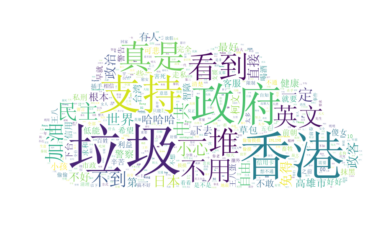

In [77]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

alice_mask = np.array(Image.open("images/cloud_mask7.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, font_path="simsun.ttf")
wc.generate_from_frequencies(Counter(terms))

#store to file
picture_name = "images/wordcloud.png"
wc.to_file(picture_name)

# show word cloud
#plt.rcParams["figure.figsize"] = (100,80)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()